In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab Notebooks/Data Science'

Mounted at /content/drive


In [9]:
def read_in_csv(file_name):
    with open(file_name) as csvfile:
        next(csvfile)
        csv_reader = csv.reader(csvfile, delimiter=",")
        return list(csv_reader)

def run_analysis():
    # read in .csv file and convert the types to floats and bools as appropriate
    type_table = "float bool bool float bool float float bool float float bool float bool".split(' ')
    label_table = "age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT".split(',')
    data = read_in_csv( data_path + "/Heart Failure.csv" )
    for rowIndx, row in enumerate(data):
        for colIndx, point in enumerate(row):
            if type_table[colIndx] == "float":
                data[rowIndx][colIndx] = float(point)
            elif type_table[colIndx] == "bool":
                data[rowIndx][colIndx] = float(point)

    without_last_col = np.array([x[:-1] for x in data])


    # for colIndx in range(len(data[0])-1):
    #     fig1, ax1 = plt.subplots()
    #     ax1.set_title(label_table[colIndx])
    #     ax1.boxplot(without_last_col[:,colIndx])
    #     plt.show()

if __name__ == "__main__":
    run_analysis()

In [21]:
import pandas as pd
data = pd.read_csv( data_path + "/Heart Failure.csv" )
data.drop("time",axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


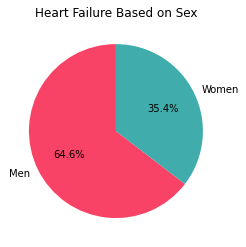

In [155]:
sex_data = data[['sex', 'DEATH_EVENT']]
sex_data = sex_data.loc[sex_data['DEATH_EVENT'] == 1]

men = (sex_data['sex'] == 1).sum()
women = (sex_data['sex'] == 0).sum()

plt.pie((men,women), labels = ["Men", "Women"],autopct='%1.1f%%',colors=['#f84266','#41acac'],startangle=90)
plt.title("Heart Failure Based on Sex")
plt.show() 

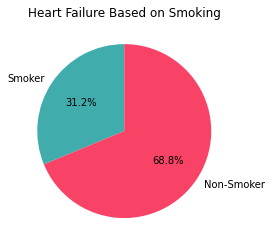

In [152]:
smoking_data = data[['smoking', 'DEATH_EVENT']]
smoking_data = smoking_data.loc[smoking_data['DEATH_EVENT'] == 1]

smokers = (smoking_data['smoking'] == 1).sum()
nonsmokers = (smoking_data['smoking'] == 0).sum()

plt.pie((smokers,nonsmokers), labels = ["Smoker", "Non-Smoker"], autopct='%1.1f%%', colors=['#41acac','#f84266'], startangle=90)
plt.title("Heart Failure Based on Smoking")
plt.show() 

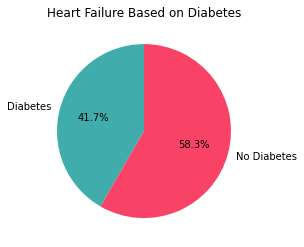

In [154]:
diabet_data = data[['diabetes', 'DEATH_EVENT']]
diabet_data = diabet_data.loc[diabet_data['DEATH_EVENT'] == 1]

diab = (diabet_data['diabetes'] == 1).sum()
noDiab = (diabet_data['diabetes'] == 0).sum()

plt.pie((diab,noDiab), labels = ["Diabetes", "No Diabetes"], autopct='%1.1f%%', colors=['#41acac','#f84266'], startangle=90)
plt.title("Heart Failure Based on Diabetes")
plt.show() 

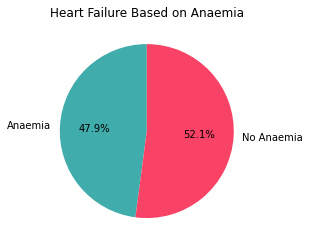

In [153]:
anaemia_data = data[['anaemia', 'DEATH_EVENT']]
anaemia_data = anaemia_data.loc[anaemia_data['DEATH_EVENT'] == 1]

anaemia = (anaemia_data['anaemia'] == 1).sum()
noAnaemia = (anaemia_data['anaemia'] == 0).sum()

plt.pie((anaemia,noAnaemia), labels = ["Anaemia", "No Anaemia"], autopct='%1.1f%%', colors=['#41acac','#f84266'], startangle=90)
plt.title("Heart Failure Based on Anaemia")
plt.show() 

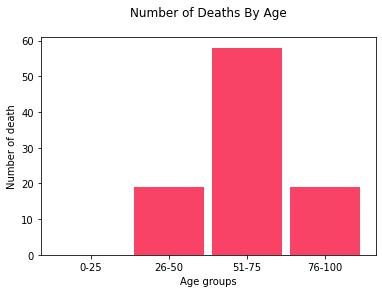

In [148]:
age_data = data[['age', 'DEATH_EVENT']]
age_data = age_data.loc[age_data['DEATH_EVENT'] == 1]

first_group = age_data[age_data['age'].between(0, 25)].sum()["DEATH_EVENT"]
second_group = age_data[age_data['age'].between(26, 50)].sum()["DEATH_EVENT"]
third_group = age_data[age_data['age'].between(51, 75)].sum()["DEATH_EVENT"]
fourth_group = age_data[age_data['age'].between(76, 100)].sum()["DEATH_EVENT"]

values = [first_group, second_group, third_group, fourth_group]
groups = ["0-25", "26-50", "51-75", "76-100"]

plt.bar(groups, values, color ='#f84266', width = .9)
plt.xlabel("Age groups")
plt.ylabel("Number of death")
plt.title("Number of Deaths By Age\n")
# plt.pie(values, labels = groups, autopct='%1.1f%%', colors=['#41acac','#f84266',"yellow","green"], startangle=90)
plt.show() 